## Datos
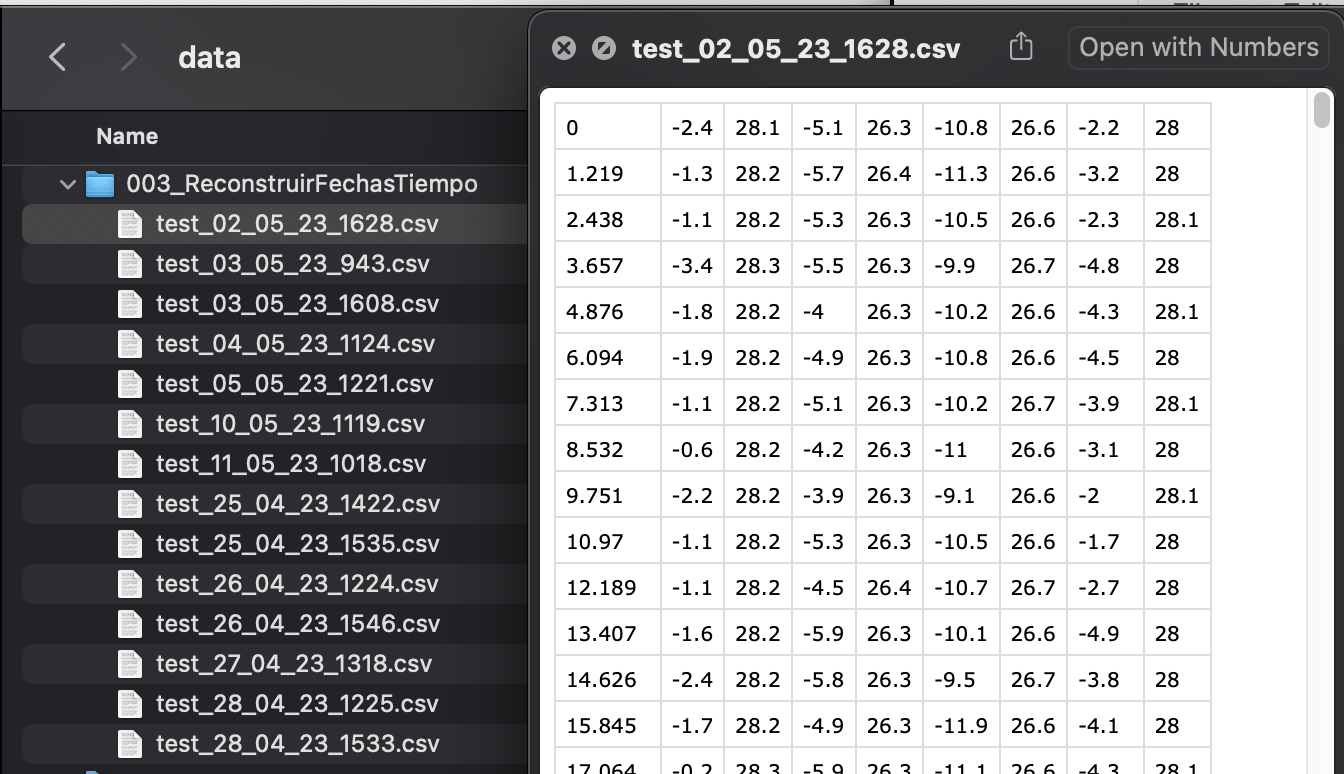


* Archivo con primera columna con tiempo transcurrido en segundos, y datos de flujo de calor y temperatura alternándose.
* Fecha y hora de termino en el nombre del archivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import glob as glob


In [2]:
def importa_datos(f):
    dia, mes, anio, hhmm = f[49:-4].split('_')
    minuto = int(hhmm[-2:])
    hora   = int(hhmm [:-2])
    anio   = int(anio) +  2000
    dia    = int(dia)
    mes    = int(mes)


    a1 = pd.read_csv(f,names=['dt','q1','Ts1','q2','Ts2','q3','Ts3','q4','Ts4'])
    a1['fecha_t'] =  pd.to_datetime(datetime.datetime(anio,mes,dia,hora,minuto))
    a1.dt = pd.to_timedelta(a1.dt,unit='S')

    a1['tiempo'] = a1.fecha_t - a1.dt
    a1.set_index('tiempo',inplace=True)
    a1.sort_index(inplace=True)
    del a1['dt']
    del a1['fecha_t']
    return a1

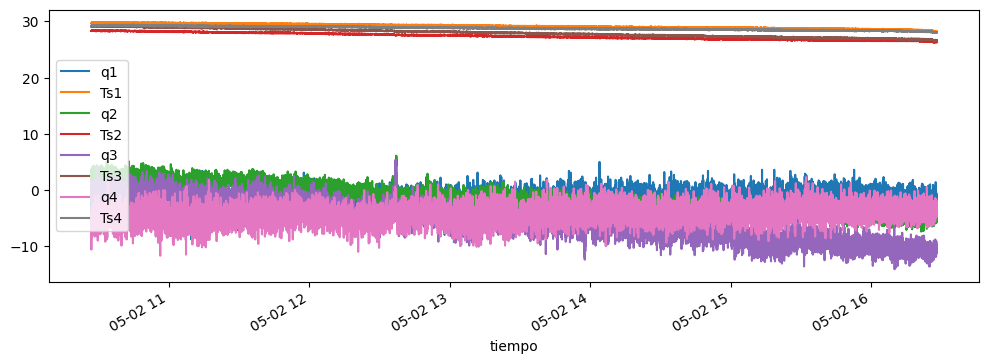

In [3]:
a1 = importa_datos('../data/001_raw/003_ReconstruirFechasTiempo/test_02_05_23_1628.csv')
a1.plot(figsize=(12,4));


In [4]:
archivos = glob.glob('../data/001_raw/003_ReconstruirFechasTiempo/*')

datos = pd.concat([importa_datos(archivo) for archivo in archivos ])
datos.sort_index(inplace=True)


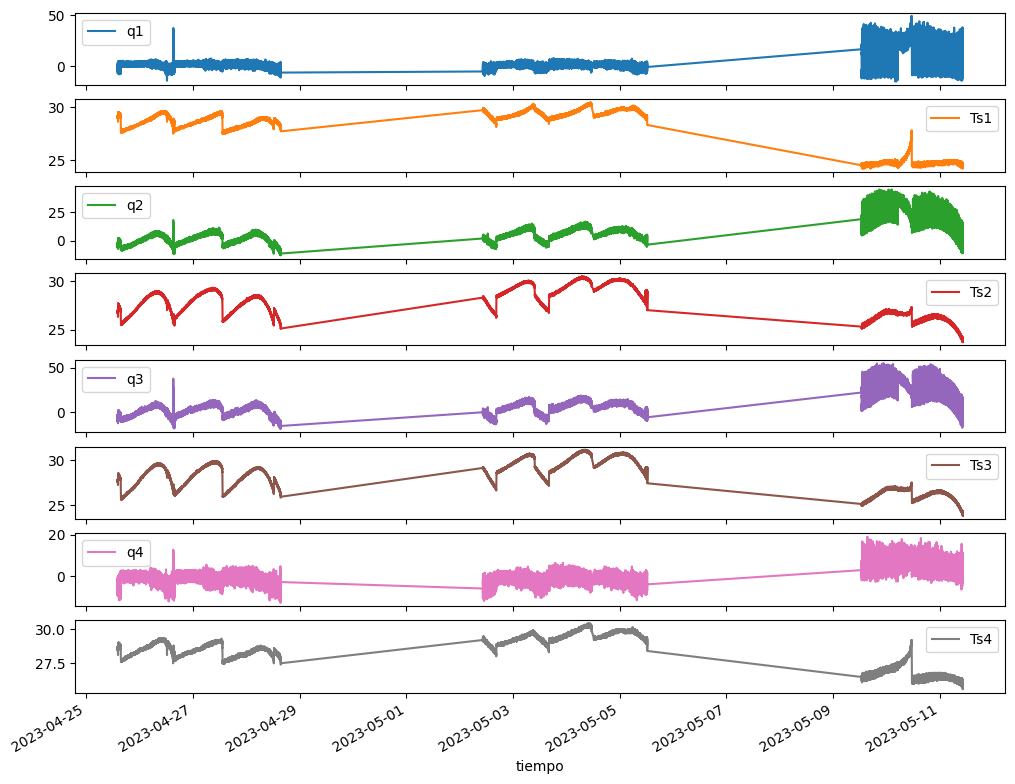

In [5]:
datos.plot(subplots=True,figsize=(12,10));


In [6]:
datos = datos.resample('1Min').mean()
datos.to_csv('../data/002_processed/Ts-q.csv')


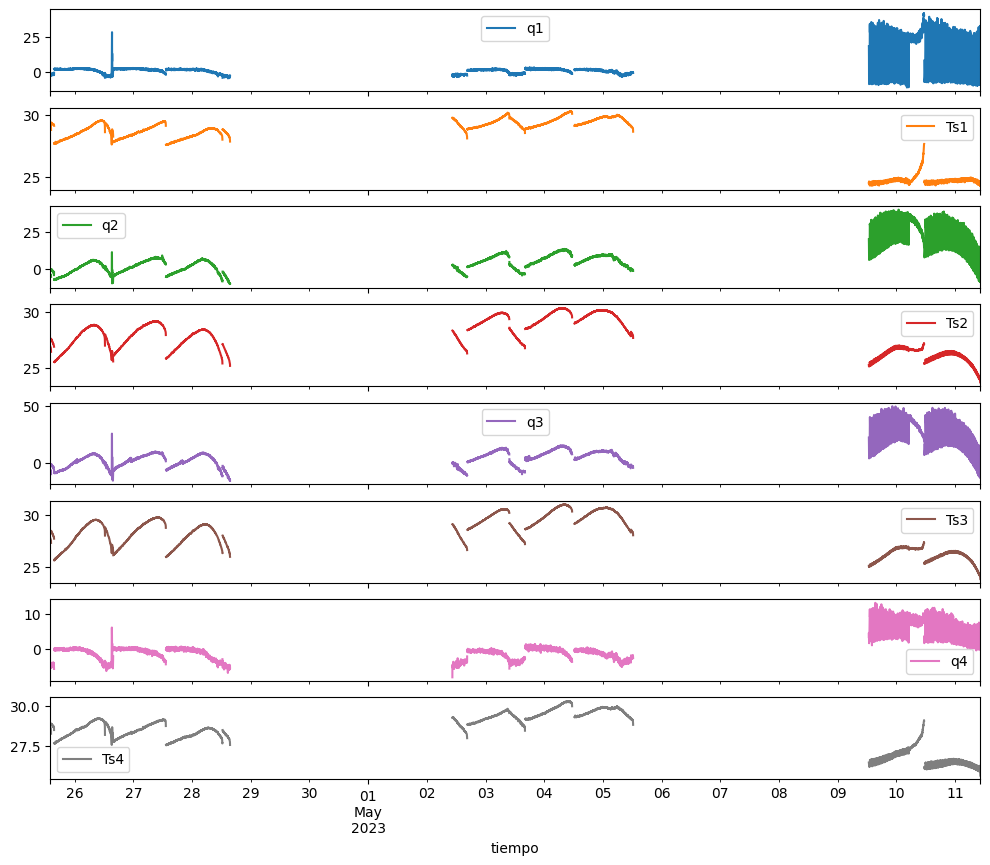

In [7]:
dat = pd.read_csv('../data/002_processed/Ts-q.csv',index_col=0,parse_dates=True)
dat.plot(subplots=True,figsize=(12,10));
